<a href="https://colab.research.google.com/github/anura-g/models/blob/master/MNIST_GAN_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
BATCH_SIZE = 150

#transforms data to tensor format
transform = transforms.Compose([transforms.ToTensor()])

#Download only training data and transform it to tensor format
trainset = torchvision.datasets.MNIST('./NewData', download=True, train=True, transform=transform)

#We can iterate through this and train our data in batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 19819098.88it/s]                            


Extracting ./NewData/MNIST/raw/train-images-idx3-ubyte.gz to ./NewData/MNIST/raw


32768it [00:00, 289565.23it/s]                           
0it [00:00, ?it/s]

Extracting ./NewData/MNIST/raw/train-labels-idx1-ubyte.gz to ./NewData/MNIST/raw


1654784it [00:00, 4991170.76it/s]                           
8192it [00:00, 121232.58it/s]


Extracting ./NewData/MNIST/raw/t10k-images-idx3-ubyte.gz to ./NewData/MNIST/raw
Extracting ./NewData/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./NewData/MNIST/raw
Processing...
Done!


torch.Size([150, 784])
(3, 572, 242)


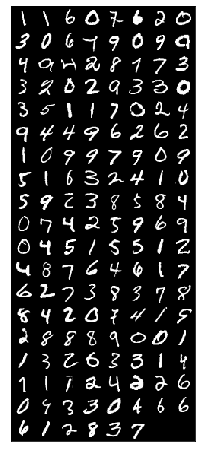

In [3]:
data_iter = iter(trainloader)

images, labels = data_iter.next()
test = images.view(images.size(0), -1)
print(test.size())

Z_dim = 100
X_dim = test.size(1)
h_dim = 128
lr = 0.001
EPOCH_SIZE = 25


#function to visualise raw data
def imshow(img):
  im = torchvision.utils.make_grid(img)
  npimg = im.numpy()
  print(npimg.shape)
  plt.figure(figsize=(8,8))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.xticks([])
  plt.yticks([])
  plt.show()

imshow(images)



In [0]:
def init_weight(m):
  if type(m) == nn.Linear:
    nn.init.xavier_uniform_(m.weight)
    m.bias.data.fill_(0)

class Generator(nn.Module):
    def __init__(self):
      super(Generator, self).__init__()
      self.model = nn.Sequential(
          nn.Linear(Z_dim, h_dim),
          nn.ReLU(),
          nn.Linear(h_dim, X_dim),
          nn.Sigmoid()
      )
      self.model.apply(init_weight)
    def forward(self, input):
      return self.model(input)


In [0]:
class Discriminator(nn.Module):
    def __init__(self):
      super(Discriminator, self).__init__()
      self.model = nn.Sequential(
          nn.Linear(X_dim, h_dim),
          nn.ReLU(),
          nn.Linear(h_dim, 1),
          nn.Sigmoid()
      )
      self.model.apply(init_weight)
    def forward(self, input):
      return self.model(input)


In [0]:
G = Generator()
D = Discriminator()

G_solver = optim.Adam(G.parameters(), lr=lr)
D_solver = optim.Adam(D.parameters(), lr=lr)

Epoch: 0, G_loss: 5.396298810839653, D_loss: 0.09477746966062113
(3, 572, 242)


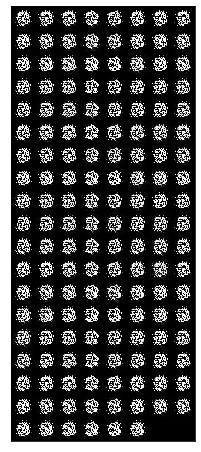

Epoch: 1, G_loss: 9.609688448905946, D_loss: 0.0341909330454655
(3, 572, 242)


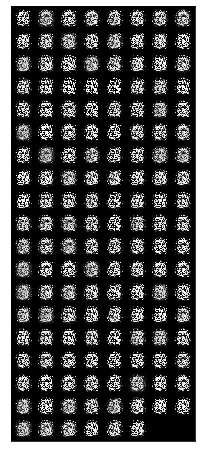

Epoch: 2, G_loss: 7.081161087751388, D_loss: 0.04056896203430369
(3, 572, 242)


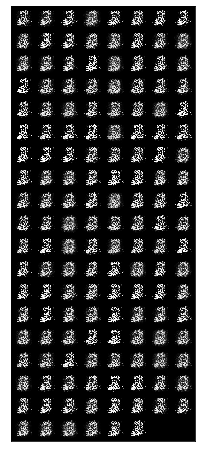

Epoch: 3, G_loss: 5.8523072230815885, D_loss: 0.0422788967564702
(3, 572, 242)


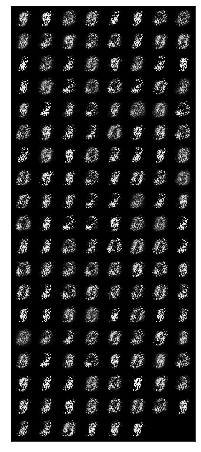

Epoch: 4, G_loss: 5.535283953547478, D_loss: 0.0623315108101815
(3, 572, 242)


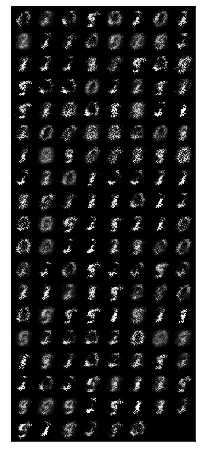

Epoch: 5, G_loss: 4.974925765395165, D_loss: 0.08684631895273924
(3, 572, 242)


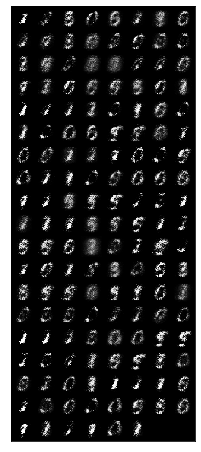

Epoch: 6, G_loss: 4.902468728423119, D_loss: 0.13732339163310825
(3, 572, 242)


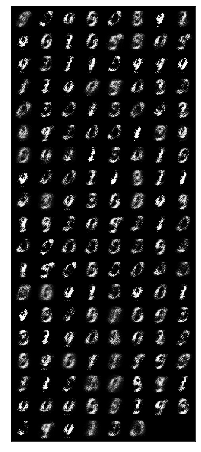

Epoch: 7, G_loss: 4.740800493359566, D_loss: 0.17480870993807912
(3, 572, 242)


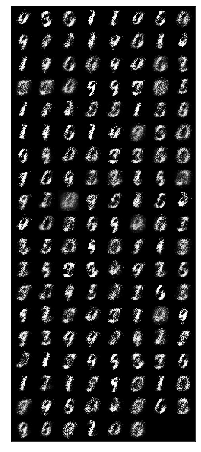

Epoch: 8, G_loss: 4.781519240736961, D_loss: 0.23285056509077548
(3, 572, 242)


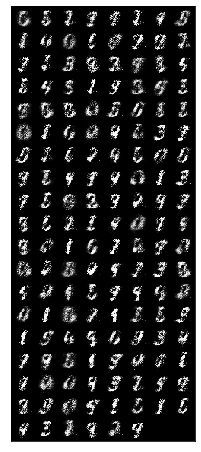

Epoch: 9, G_loss: 4.869757658243179, D_loss: 0.23820858649909496
(3, 572, 242)


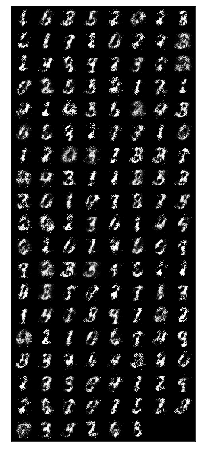

Epoch: 10, G_loss: 5.421410653591156, D_loss: 0.24958946434780954
(3, 572, 242)


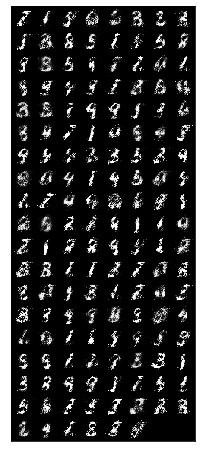

Epoch: 11, G_loss: 4.864349234104156, D_loss: 0.2938066558167338
(3, 572, 242)


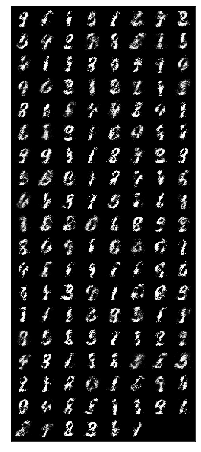

Epoch: 12, G_loss: 4.120756881833077, D_loss: 0.3915468702837825
(3, 572, 242)


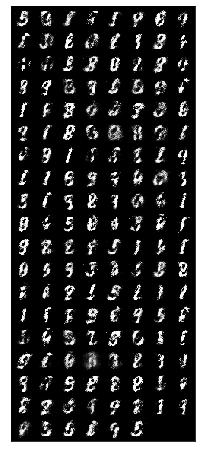

Epoch: 13, G_loss: 4.309246868491173, D_loss: 0.4125974528864026
(3, 572, 242)


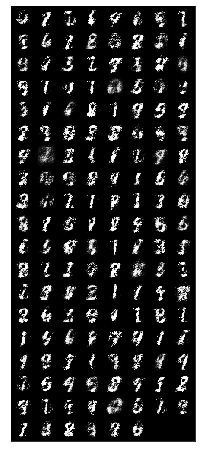

Epoch: 14, G_loss: 4.59990441262722, D_loss: 0.41200512267649175
(3, 572, 242)


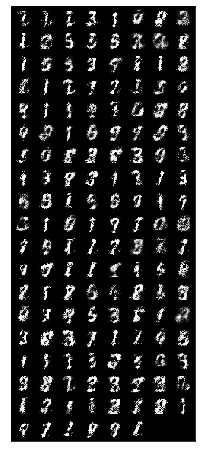

Epoch: 15, G_loss: 3.885494322180748, D_loss: 0.44734124474227427
(3, 572, 242)


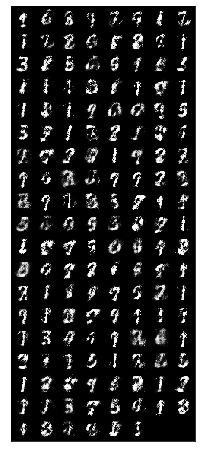

Epoch: 16, G_loss: 3.4177996426820756, D_loss: 0.4835216462984681
(3, 572, 242)


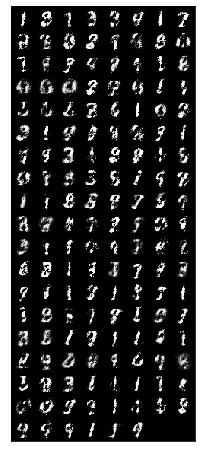

Epoch: 17, G_loss: 3.576536753773689, D_loss: 0.5113329160958529
(3, 572, 242)


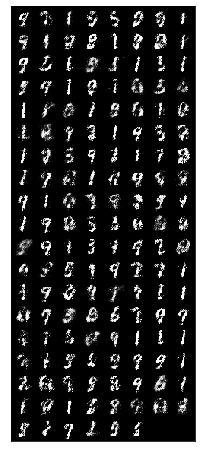

Epoch: 18, G_loss: 3.2713515621423723, D_loss: 0.5187186715006828
(3, 572, 242)


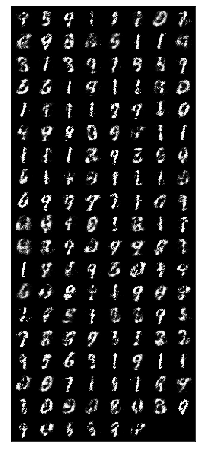

Epoch: 19, G_loss: 3.219835034608841, D_loss: 0.5188071757555008
(3, 572, 242)


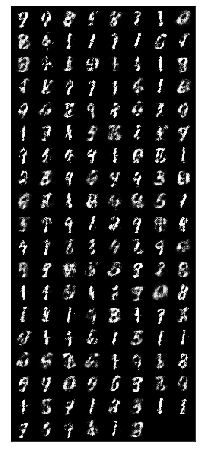

Epoch: 20, G_loss: 2.892122037410736, D_loss: 0.5745475655049086
(3, 572, 242)


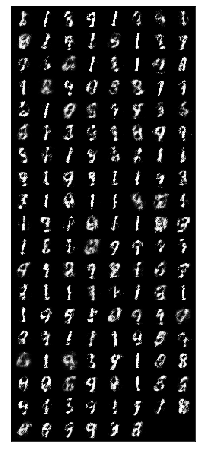

Epoch: 21, G_loss: 2.8284840315580366, D_loss: 0.6022414714843035
(3, 572, 242)


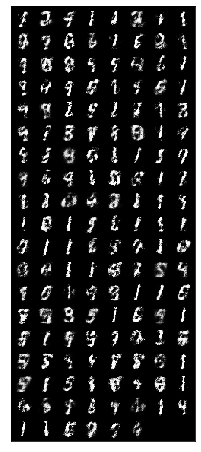

Epoch: 22, G_loss: 2.8888847434520724, D_loss: 0.6296582259237766
(3, 572, 242)


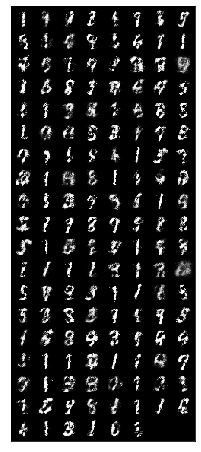

Epoch: 23, G_loss: 2.813189056813717, D_loss: 0.6512720438092947
(3, 572, 242)


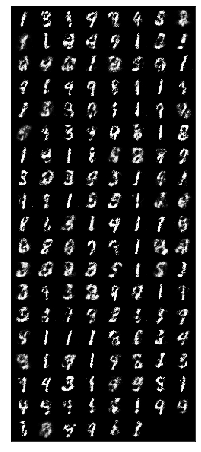

Epoch: 24, G_loss: 2.644211793243885, D_loss: 0.6974780096113682
(3, 572, 242)


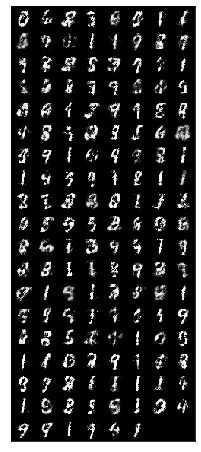

In [7]:
for epoch in range(EPOCH_SIZE):
  G_loss_run = 0.0
  D_loss_run = 0.0

  for i, data in enumerate(trainloader):
    X,_ = data
    BATCH_SIZE = X.size(0)
    X = X.view(X.size(0), -1)

    one_labels = torch.ones(BATCH_SIZE, 1)
    zero_labels = torch.zeros(BATCH_SIZE, 1)

    z = torch.randn(BATCH_SIZE, Z_dim)
    G_sample = G(z)
    D_fake = D(G_sample)
    D_real = D(X)
    D_fake_loss = F.binary_cross_entropy(D_fake, zero_labels)
    D_real_loss = F.binary_cross_entropy(D_real, one_labels)

    D_loss = D_fake_loss + D_real_loss
    D_solver.zero_grad()
    D_loss.backward()
    D_solver.step()

    z = torch.randn(BATCH_SIZE, Z_dim)
    G_sample = G(z)
    D_fake = D(G_sample)

    G_loss = F.binary_cross_entropy(D_fake, one_labels)
    G_solver.zero_grad()
    G_loss.backward()
    G_solver.step()

    G_loss_run += G_loss.item()
    D_loss_run += D_loss.item()

  print('Epoch: {}, G_loss: {}, D_loss: {}'.format(epoch, G_loss_run/(i+1), D_loss_run/(i+1)))
  samples = G(z).detach()
  samples = samples.view(samples.size(0), 1, 28, 28)
  imshow(samples)



